In [1]:
# 4.1

from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt


In [2]:
a = 2
b = 1
sy = 66
n = 44

shape = a + sy
rate = b + n
scale = 1 / rate
gdist = gamma(a=shape, scale=scale)

theta_mc10 = gdist.rvs(10)
theta_mc100 = gdist.rvs(100)
theta_mc1000 = gdist.rvs(1000)

In [3]:
np.mean(theta_mc10)

1.505818194665337

In [4]:
np.mean(theta_mc100)

1.5226877927698976

In [5]:
np.mean(theta_mc1000)

1.4979575200563402

In [6]:
np.mean(theta_mc10 < 1.75)

1.0

In [7]:
np.mean(theta_mc100 < 1.75)

0.88

In [8]:
np.mean(theta_mc1000 < 1.75)

0.928

In [9]:
np.quantile(theta_mc10,[0.025, 0.975])

array([1.24587003, 1.72537897])

In [10]:
np.quantile(theta_mc100,[0.025, 0.975])

array([1.19610443, 1.92135664])

In [11]:
np.quantile(theta_mc1000,[0.025, 0.975])

array([1.17482991, 1.87892167])

In [12]:
cumulative_means = []
cumulative_cdf = []
cumulative_95q = []
for i in range(1, 1000):
    mc_sample = gdist.rvs(i)
    
    sample_mean = np.mean(mc_sample)
    cumulative_means.append(sample_mean)
    
    sample_cdf = np.mean(mc_sample < 1.75)
    cumulative_cdf.append(sample_cdf)
    
    sample_95q = np.quantile(mc_sample, 0.975)
    cumulative_95q.append(sample_95q)

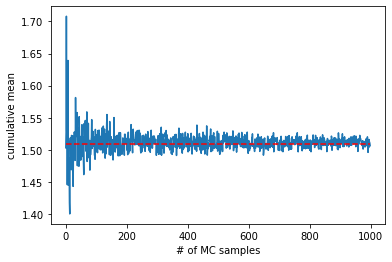

In [13]:
plt.plot(cumulative_means)
plt.xlabel('# of MC samples');
plt.ylabel('cumulative mean');

post_mean = np.array([1.51 for i in range(len(cumulative_means))])
plt.plot(post_mean, 'r--');

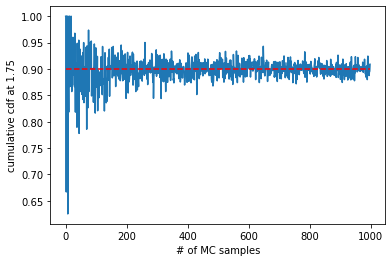

In [14]:
plt.plot(cumulative_cdf)
plt.xlabel('# of MC samples');
plt.ylabel('cumulative cdf at 1.75');

post_mean = np.array([0.90 for i in range(len(cumulative_means))]);
plt.plot(post_mean, 'r--');

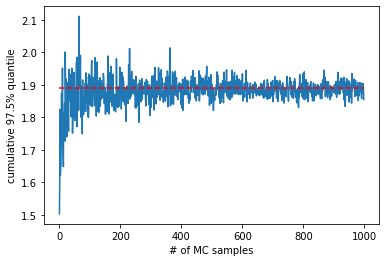

In [15]:
plt.plot(cumulative_95q)
plt.xlabel('# of MC samples');
plt.ylabel('cumulative 97.5% quantile');

post_mean = np.array([1.89 for i in range(len(cumulative_means))]);
plt.plot(post_mean, 'r--');